In [ ]:
!pip install split-folders

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import splitfolders
from glob import glob
from shutil import copyfile
import pandas as pd

** Loading the data and prepare directories**



In [ ]:
!pip install ZipFile
from zipfile import ZipFile

with ZipFile('/content/archive.zip', 'r') as zipObj:
   zipObj.extractall('/content/drive/MyDrive/APPAuto/')


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/APPAuto/jaypee_metadata.csv')
dataset = np.array(dataframe)
        

nrml_imgs=dataframe[dataframe['findings']=="False"].study_id.unique()
Tubs_imgs=dataframe[dataframe['findings']=="Tuberculosis"].study_id.unique() 

all_images= glob('/content/drive/MyDrive/APPAuto/images//*.jpg')
print(len(all_images))


train_path='/content/drive/MyDrive/APPAuto/data/train'
test_path='/content/drive/MyDrive/APPAuto/data/test'

# os.mkdir('/content/drive/MyDrive/APPAuto/data')
# os.mkdir(os.path.join('./',train_path))
# os.mkdir(os.path.join('./',test_path))

# os.mkdir(os.path.join('./',train_path,'False'))
# os.mkdir(os.path.join('./',train_path,'Tuberculosis'))

# os.mkdir(os.path.join('./',test_path,'False'))
# os.mkdir(os.path.join('./',test_path,'Tuberculosis'))



for labels in all_images :
    img_name= labels.split('/')[-1]
    if "TRAIN" in img_name:
        if img_name in nrml_imgs :
            copyfile(labels,os.path.join(train_path+'/False',img_name))
        elif img_name in Tubs_imgs:
            copyfile(labels,os.path.join(train_path+'/Tuberculosis',img_name))
    elif "TEST" in img_name :
        if img_name in nrml_imgs :
            copyfile(labels,os.path.join(test_path+'/False',img_name))
        elif img_name in Tubs_imgs:
            copyfile(labels,os.path.join(test_path+'/Tuberculosis',img_name))

print(len(os.listdir(train_path+'/False')),end=('\t'))
print(len(os.listdir(train_path+'/Tuberculosis')))
print(len(os.listdir(test_path+'/False')),end=('\t'))
print(len(os.listdir(test_path+'/Tuberculosis')))


labels = dataframe['findings'].unique().tolist()
img_size = 256

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]  # convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


splitfolders.ratio("/content/drive/MyDrive/APPAuto/data/train", output = "/content/drive/MyDrive/APPAuto/data/Train_val", seed = 823, ratio = (.8, .2))

train_path = "/content/drive/MyDrive/APPAuto/data/Train_val/train"
val_path = "/content/drive/MyDrive/APPAuto/data/Train_val/val"
test_path = "/content/drive/MyDrive/APPAuto/data/test"

train = get_data(train_path)
val = get_data(val_path)
test=get_data(test_path)

155
51	52
26	26


Copying files: 103 files [00:01, 56.30 files/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


*** Visualize the data***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tuberculosis')

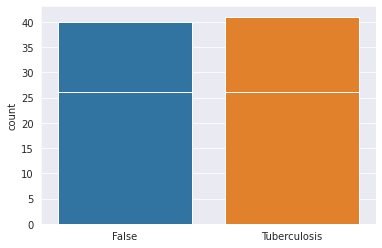

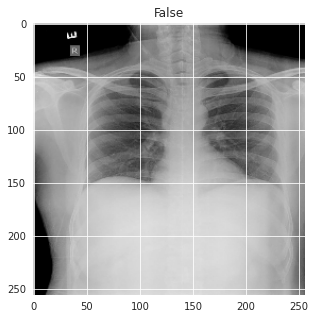

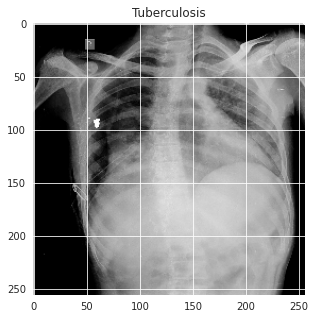

In [ ]:
train_list = []
for i in train:
    if i[1] == 0:
        train_list.append("False")
    else:
        train_list.append("Tuberculosis")


test_list = []
for i in test:
    if i[1] == 0:
        test_list.append("False")
    else:
        test_list.append("Tuberculosis")


sns.set_style("darkgrid")
sns.countplot(train_list)
sns.set_style("darkgrid")
sns.countplot(test_list)

plt.figure(figsize=(5, 5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.figure(figsize=(5, 5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

*** Data Preprocessing and Data Augmentation***


In [ ]:

x_train = []
y_train = []
x_val = []
y_val = []
x_test=[]
y_test=[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
        x_test.append(feature)
        y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test=np.array(y_test)

datagen = ImageDataGenerator(
    rescale=(1 / 255),
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.2,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # randomly flip images

datagen.fit(x_train)

In [ ]:
model=Sequential()
model.add(tf.keras.applications.MobileNetV2(weights='imagenet',input_shape=(256,256,3),include_top=False))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(4096,activation='relu',name='fc1'))
model.add(Dense(4096,activation='relu',name='fc2'))
model.add(Dense(1000,activation='relu',name='fc3'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation="linear"))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 fc1 (Dense)                 (None, 4096)              5246976   
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 fc3 (Dense)                 (None, 1000)              4097000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
svmhisto=model.fit(x_train,y_train, epochs=20,validation_data=(x_val,y_val))
model.save('MobileNetV2.h5')

Epoch 1/20
3/3 [==============================] - 30s 7s/step - loss: 2.4458 - accuracy: 0.5679 - val_loss: 4.8884 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 23s 7s/step - loss: 1.1054 - accuracy: 0.4568 - val_loss: 4.6128 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 24s 7s/step - loss: 0.7200 - accuracy: 0.5062 - val_loss: 2.8971 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 24s 8s/step - loss: 0.6454 - accuracy: 0.5432 - val_loss: 8.5908 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 24s 7s/step - loss: 0.4951 - accuracy: 0.8025 - val_loss: 20.3127 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 24s 7s/step - loss: 0.3259 - accuracy: 0.8642 - val_loss: 29.6469 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 24s 7s/step - loss: 0.1486 - accuracy: 0.9383 - val_loss: 20.0369 - val_accuracy: 0.5000
Epoch 8/20
3/3 [===============

**Evaluating the result**

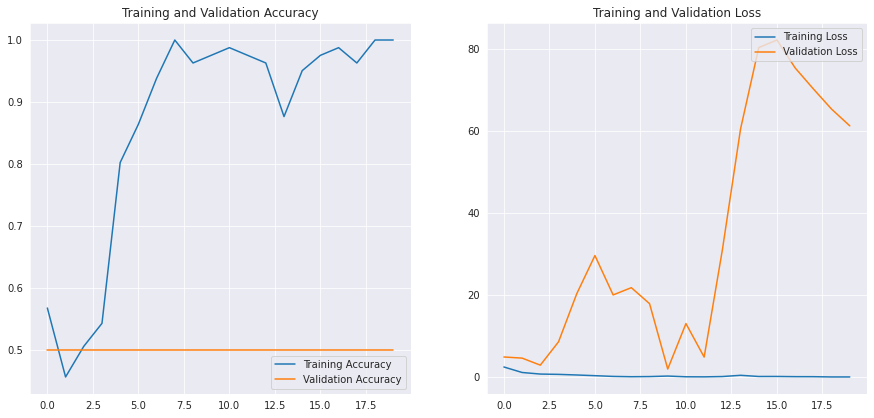

In [ ]:
acc = svmhisto.history["accuracy"]
val_acc = svmhisto.history["val_accuracy"]
loss = svmhisto.history["loss"]
val_loss = svmhisto.history["val_loss"]

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()


**Prediction**

In [ ]:
model=tf.keras.models.load_model('/content/MobileNetV2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 fc1 (Dense)                 (None, 4096)              5246976   
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 fc3 (Dense)                 (None, 1000)              4097000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)             

In [ ]:

predictions = model.predict(x_test)
predictions = predictions.reshape(1, -1)[0]
print(
    classification_report(
        y_test, predictions, target_names=["False (Class 0)", "Tubs (Class 1)"]
    )
)

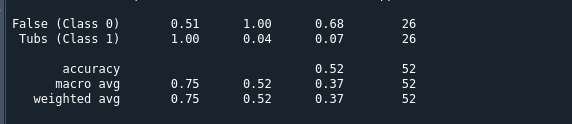